In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
Medtry=pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2017.txt',delimiter='\t') 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
Medtry1=Medtry.copy() 
Medtry11=Medtry.copy() 
Medtry1.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,CPT copyright 2016 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,100.0,96.0,100.0,73.398800,325.780000,56.827200,57.492400
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,Hospital observation care typically 30 minutes,N,26.0,25.0,26.0,100.080000,449.000000,78.460000,79.306154
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,52.0,51.0,52.0,136.380000,614.000000,102.807692,103.895385
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,59.0,59.0,59.0,190.363729,755.932203,141.293559,142.865763


In [48]:
Medus=Medtry11.loc[Medtry11['nppes_provider_country'] == 'US']
#select the data from US
Medus

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,100.0,96.0,100.0,73.398800,325.780000,56.827200,57.492400
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,Hospital observation care typically 30 minutes,N,26.0,25.0,26.0,100.080000,449.000000,78.460000,79.306154
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,52.0,51.0,52.0,136.380000,614.000000,102.807692,103.895385
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,59.0,59.0,59.0,190.363729,755.932203,141.293559,142.865763
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,16.0,16.0,16.0,101.680000,462.812500,79.710000,80.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847439,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99214,Established patient office or other outpatient...,N,248.0,175.0,248.0,116.860000,345.000000,85.637177,80.263065
9847440,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99223,"Initial hospital inpatient care, typically 70 ...",N,41.0,41.0,41.0,203.400000,496.000000,225.564634,155.800732
9847441,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99232,"Subsequent hospital inpatient care, typically ...",N,101.0,57.0,101.0,72.480000,176.000000,83.200000,57.390000
9847442,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99233,"Subsequent hospital inpatient care, typically ...",N,102.0,55.0,102.0,104.760000,254.000000,119.450784,82.450490


# Map areas in US

In [49]:
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}
#generate a dictionary for states divided into different regions

In [50]:
Medus['region'] = Medus.nppes_provider_state.map(states)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
Medtry2=Medus.loc[:,['average_submitted_chrg_amt','average_Medicare_standard_amt','region']]
Medtry3=Medus.loc[:,['hcpcs_code','region','average_submitted_chrg_amt','average_Medicare_standard_amt']]
#select important columns
Medtry2.head()

,average_submitted_chrg_amt,average_Medicare_standard_amt,region
1,325.780000,57.492400,N
2,449.000000,79.306154,N
3,614.000000,103.895385,N
4,755.932203,142.865763,N
5,462.812500,80.750000,N


In [70]:
Medtryclean=Medtry2.dropna(axis=0,how='any')
Medtryclean2=Medtry3.dropna(axis=0,how='any')
#clean the data
Medtryclean.head()

,average_submitted_chrg_amt,average_Medicare_standard_amt,region
1,325.780000,57.492400,N
2,449.000000,79.306154,N
3,614.000000,103.895385,N
4,755.932203,142.865763,N
5,462.812500,80.750000,N


In [82]:
Medtryclean21=Medtryclean2.reset_index(drop=True)
#reset the index
Medtryclean21

,hcpcs_code,region,average_submitted_chrg_amt,average_Medicare_standard_amt
0,99217,N,325.780000,57.492400
1,99218,N,449.000000,79.306154
2,99219,N,614.000000,103.895385
3,99220,N,755.932203,142.865763
4,99221,N,462.812500,80.750000
...,...,...,...,...
9846206,99214,W,345.000000,80.263065
9846207,99223,S,496.000000,155.800732
9846208,99232,S,176.000000,57.390000
9846209,99233,S,254.000000,82.450490


In [54]:
dummie=pd.get_dummies(Medtryclean['region'],prefix='Region')
#one-hot encoding

In [55]:
Medtryclean = pd.concat([Medtryclean,dummie],axis=1)
Medtryclean

,average_submitted_chrg_amt,average_Medicare_standard_amt,region,Region_M,Region_N,Region_O,Region_S,Region_W
1,325.780000,57.492400,N,0,1,0,0,0
2,449.000000,79.306154,N,0,1,0,0,0
3,614.000000,103.895385,N,0,1,0,0,0
4,755.932203,142.865763,N,0,1,0,0,0
5,462.812500,80.750000,N,0,1,0,0,0
...,...,...,...,...,...,...,...,...
9847439,345.000000,80.263065,W,0,0,0,0,1
9847440,496.000000,155.800732,S,0,0,0,1,0
9847441,176.000000,57.390000,S,0,0,0,1,0
9847442,254.000000,82.450490,S,0,0,0,1,0


In [56]:
Medtryclean.drop(['region'],axis=1, inplace=True)
#delete unnecessary columns

In [90]:
Medtryclean1=Medtryclean.copy()
Medtryclean1=Medtryclean.dropna()
Medtryclean1=Medtryclean11.reset_index(drop=True)
#reset the index

# Standardize the Data and Find the outliers

In [58]:
scaler = preprocessing.StandardScaler().fit(Medtryclean1)
MedNorm = scaler.transform(Medtryclean1)

[]

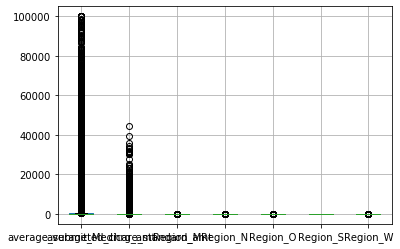

In [59]:
Medtryclean.boxplot(return_type='dict')
plt.plot()
#use boxplot to check the outliers

# K-means

In [61]:
maxClusters = 10
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=123)
    kmeans=kmeans.fit(MedNorm)
    sse.append(kmeans.inertia_)
#k-means

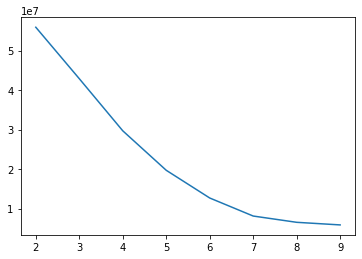

In [62]:
plt.plot(range(2,maxClusters),sse)

In [ ]:
silh = []
for nClusters in range(6,9):
    kmeans = KMeans(n_clusters=nClusters, random_state=123)
    kmeans=kmeans.fit(MedNorm)
    silhouette_avg = silhouette_score(MedNorm, kmeans.labels_)
    silh.append(silhouette_avg)

In [63]:
kmeans = KMeans(n_clusters=7, random_state=123).fit(MedNorm)

In [91]:
Medcon = pd.concat([Medtryclean21,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)
Medconva=pd.concat([Medtryclean1,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)
#output the cluster no.

In [87]:
Medcon

,hcpcs_code,region,average_submitted_chrg_amt,average_Medicare_standard_amt,Cluster
0,99217,N,325.780000,57.492400,1
1,99218,N,449.000000,79.306154,1
2,99219,N,614.000000,103.895385,1
3,99220,N,755.932203,142.865763,1
4,99221,N,462.812500,80.750000,1
...,...,...,...,...,...
9846206,99214,W,345.000000,80.263065,0
9846207,99223,S,496.000000,155.800732,2
9846208,99232,S,176.000000,57.390000,2
9846209,99233,S,254.000000,82.450490,2


In [85]:
Medcon['Cluster'].value_counts()
#count the number for each cluster

2    3599589
1    2215133
0    2079512
3    1784014
6      94494
5      71563
4       1906
Name: Cluster, dtype: int64

In [92]:
Medconva.groupby('Cluster').mean()
#calculate the average number for each cluster

,average_submitted_chrg_amt,average_Medicare_standard_amt,Region_M,Region_N,Region_O,Region_S,Region_W
Cluster,,,,,,,
0,278.469609,68.481654,0.000000,0.000000,0.000000,0.000000,1.000000
1,288.972045,67.133326,0.000000,1.000000,0.000000,0.000000,0.000000
2,281.637999,66.299560,0.000000,0.000000,0.000000,1.000000,0.000000
3,278.588534,64.023744,1.000000,0.000000,0.000000,0.000000,0.000000
4,36165.219860,10268.554523,0.112802,0.156873,0.003148,0.467996,0.259182
5,271.817982,65.337604,0.000000,0.000000,1.000000,0.000000,0.000000
6,6808.943909,1079.124439,0.175598,0.200066,0.000815,0.396766,0.226755
